In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import shapiro


In [2]:
raw_data = pd.read_excel("../Paris housing Data Set 2 4050.xlsx")
housing_df = raw_data.copy(deep=True)
housing_df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
0,221900.0,3.0,1.0,1180.0,5650.0,1.0,3.0,7,1955.0,0,1340.0
1,538000.0,3.0,NaN,2570.0,7242.0,2.0,3.0,7,1951.0,1991,1690.0
2,180000.0,2.0,1.0,770.0,10000.0,1.0,3.0,6,1933.0,0,2720.0
3,604000.0,4.0,3.0,1960.0,5000.0,1.0,5.0,7,1965.0,0,1360.0
4,510000.0,3.0,2.0,1680.0,8080.0,1.0,3.0,8,1987.0,0,1800.0


In [6]:
housing_df.dtypes

price                 float64
bedrooms              float64
bathrooms             float64
sqft_living           float64
sqft_total            float64
floors                float64
condition             float64
grade                   int64
built                 float64
renovated               int64
living_area_sqft      float64
renovated_category      int64
dtype: object

In [ ]:
# fill nan for bathrooms, bedrooms, and other values except price
housing_df[['bedrooms','sqft_total','living_area_sqft']] = housing_df[['bedrooms','sqft_total','living_area_sqft']].bfill()
housing_df['bathrooms'] = housing_df['bathrooms'].ffill()
housing_df[['sqft_living', 'condition','built']] = housing_df[['sqft_living', 'condition','built']].apply(lambda col: col.fillna(col.median()))
# drop rows where price is missing
housing_df = housing_df.dropna()
housing_df.isna().sum()

price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_total            0
floors                0
condition             0
grade                 0
built                 0
renovated             0
living_area_sqft      0
renovated_category    0
dtype: int64

In [4]:
def classify_year(value):
    if value == 0:
        return 0
    elif value < 1940:
        return 1
    elif 1940 <= value < 1960:
        return 2
    elif 1960 <= value < 1980:
        return 3
    elif 1980 <= value < 2000:
        return 4
    elif 2000 <= value < 2020:
        return 5
    else:
        return None  # You can modify this to a default value

# Apply function to column 'A'
housing_df['renovated_category'] = housing_df['renovated'].apply(classify_year)

housing_df.renovated_category.unique()

array([0, 4, 5, 3, 2, 1])

Intercept: 12795.322630487964
Slope: 252109.43013802663


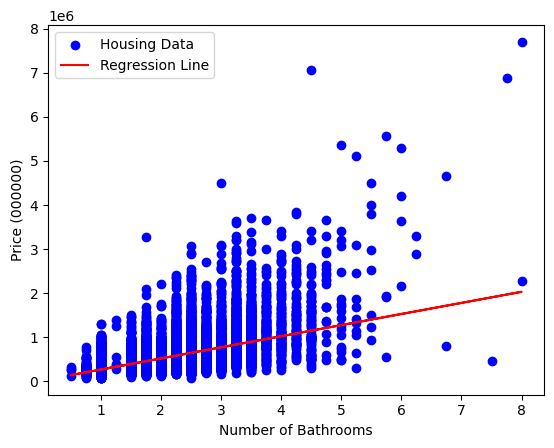

In [8]:
from sklearn.linear_model import LinearRegression
X = housing_df[['bathrooms']]  # Independent variable (must be 2D for sklearn)
Y = housing_df['price']   # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Get predictions
Y_pred = model.predict(X)

# Print regression coefficients
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

# Plot the regression line
plt.scatter(X, Y, color='blue', label="Housing Data")
plt.plot(X, Y_pred, color='red', label="Regression Line")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price (000000)")
plt.legend()
plt.show()


In [13]:
housing_df['price'] = housing_df['price']/1000
housing_df['sqft_living'] = housing_df['sqft_living']/100

Intercept: -0.04767958535684391
Slope: 0.028333990534917548


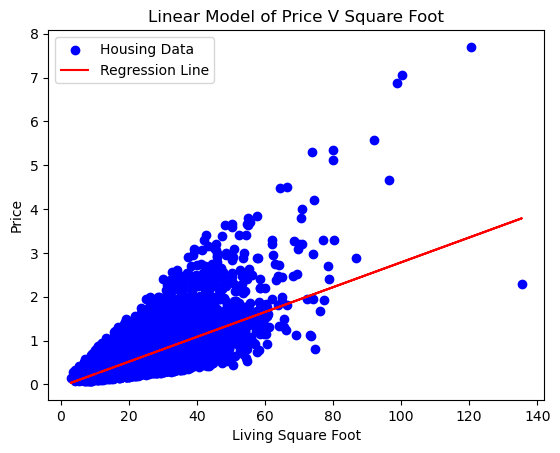

In [25]:
from sklearn.linear_model import LinearRegression
X = housing_df[['sqft_living']]  # Independent variable (must be 2D for sklearn)
Y = housing_df['price']   # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Get predictions
Y_pred = model.predict(X)

# Print regression coefficients
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

# Plot the regression line
plt.scatter(X, Y, color='blue', label="Housing Data")
plt.plot(X, Y_pred, color='red', label="Regression Line")
plt.title("Linear Model of Price V Square Foot")
plt.xlabel("Living Square Foot")
plt.ylabel("Price")
plt.legend()
plt.show()

In [20]:
housing_df.bedrooms.nunique()

12

In [24]:
bedrooms_df = housing_df[housing_df['bedrooms'] <= 6]
len(housing_df) - len(bedrooms_df)

62

In [ ]:
# import numpy as np

# # Define conditions
# conditions = [
#     (df['A'] == 0),
#     (df['A'] < 1940),
#     (df['A'].between(1940, 1959))
# ]

# # Define choices for each condition
# choices = [0, 1, 2]

# # Apply conditions
# df['category'] = np.select(conditions, choices, default=None)  # 'None' for other cases

# print(df)
